#### Exploratory Data Analysis & Key Insights
**Dataset:** KaggleV2-May-2016.zip  
**Author:** Luis Sergio Pastrana Lemus  
**Date:** 2025-05-24

## Libraries

In [1]:
import numpy as np
import os
import pandas as pd
from pathlib import Path
import pprint
import sys

# Define project root dynamically, gets the current directory from whick the notebook belongs and moves one level upper
project_root = Path.cwd().parent

# Add src to sys.path if it is not already
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# Import function directly (more controlled than import *)
from src import *

## Path to Data File

In [2]:
# Build route to data file and upload

data_file_path_pediatric_partially_clean = project_root / "data" / "processed" / "patients_pediatric_partially_clean.csv"
df_patients_pediatric = load_dataset_from_csv(data_file_path_pediatric_partially_clean, header='infer', parse_dates=['scheduled_day', 'appointment_day'])

data_file_path_adult_partially_clean = project_root / "data" / "processed" / "patients_adult_partially_clean.csv"
df_patients_adult = load_dataset_from_csv(data_file_path_adult_partially_clean, header='infer', parse_dates=['scheduled_day', 'appointment_day'])

data_file_path_clean = project_root / "data" / "processed" / "patients_clean.csv"
df_patients_clean = load_dataset_from_csv(data_file_path_clean, header='infer',  parse_dates=['scheduled_day', 'appointment_day'])

data_file_path_dayswaiting_noshow = project_root / "data" / "processed" / "patients_dayswaiting_noshow.csv"
df_patients_dayswaiting_noshow = load_dataset_from_csv(data_file_path_dayswaiting_noshow, header='infer',  parse_dates=['scheduled_day', 'appointment_day'])


In [3]:
format_notebook()

## Exploratory Data Analysis

___

### 🔍 Patients zero age EDA before cleaning the full dataset

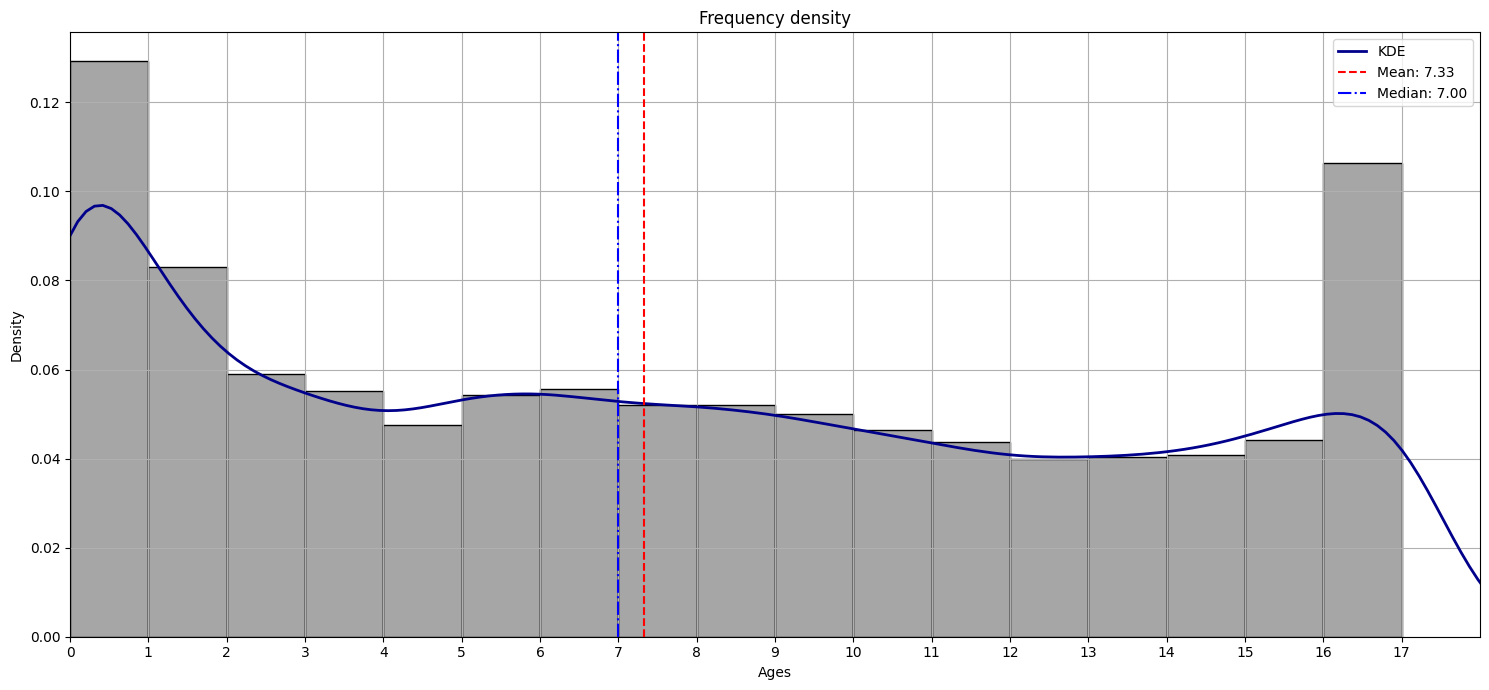

In [4]:
plot_frequency_density(ds=df_patients_pediatric['age'], bins=np.arange(0, 18, 1), color='grey', title='Frequency density', xlabel='Ages',
                        ylabel='Density', xticks_range=(0, 18, 1), show_kde=True)

In [5]:
pd.set_option('display.max_rows', 36)
print(df_patients_pediatric.groupby(['no_show', 'age']).agg({'patient_id' : 'count'}))
pd.set_option('display.max_rows', 25)

             patient_id
no_show age            
no      0          2900
        1          1858
        2          1366
        3          1236
        4          1017
        5          1169
        6          1205
        7          1126
        8          1106
        9          1008
        10          970
        11          948
        12          820
        13          800
        14          802
        15          889
        16         1049
        17         1113
yes     0           639
        1           415
        2           252
        3           277
        4           282
        5           320
        6           316
        7           301
        8           318
        9           364
        10          304
        11          247
        12          272
        13          303
        14          316
        15          322
        16          353
        17          396


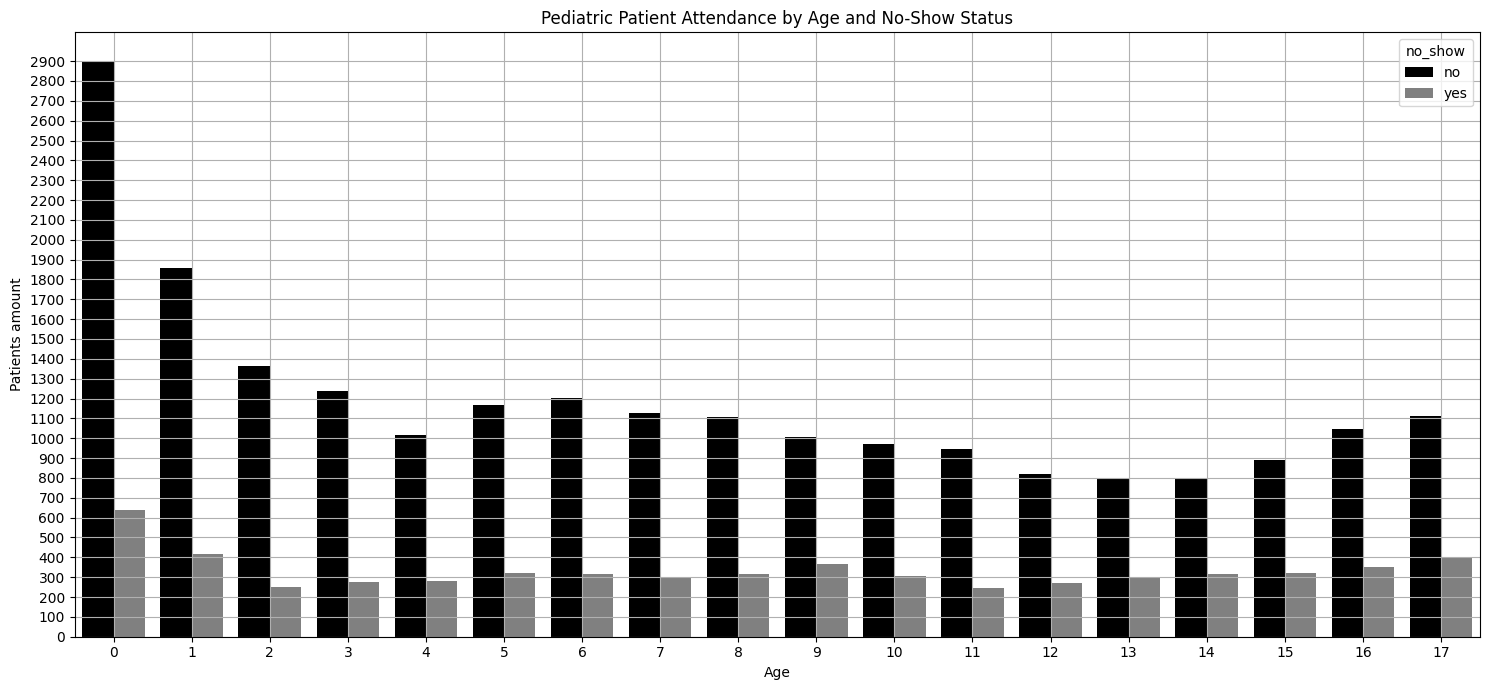

In [6]:
plot_grouped_barplot(df_patients_pediatric.groupby(['no_show', 'age']).agg({'patient_id' : 'count'}), 
                     x_col='age', y_col='patient_id', hue_col='no_show', palette=['black', 'grey'],
                     title='Pediatric Patient Attendance by Age and No-Show Status', 
                     xlabel='Age', ylabel='Patients amount', 
                     xticks_range=(0, 18, 1),
                     yticks_range=(0, 2920, 100), rotation=0)

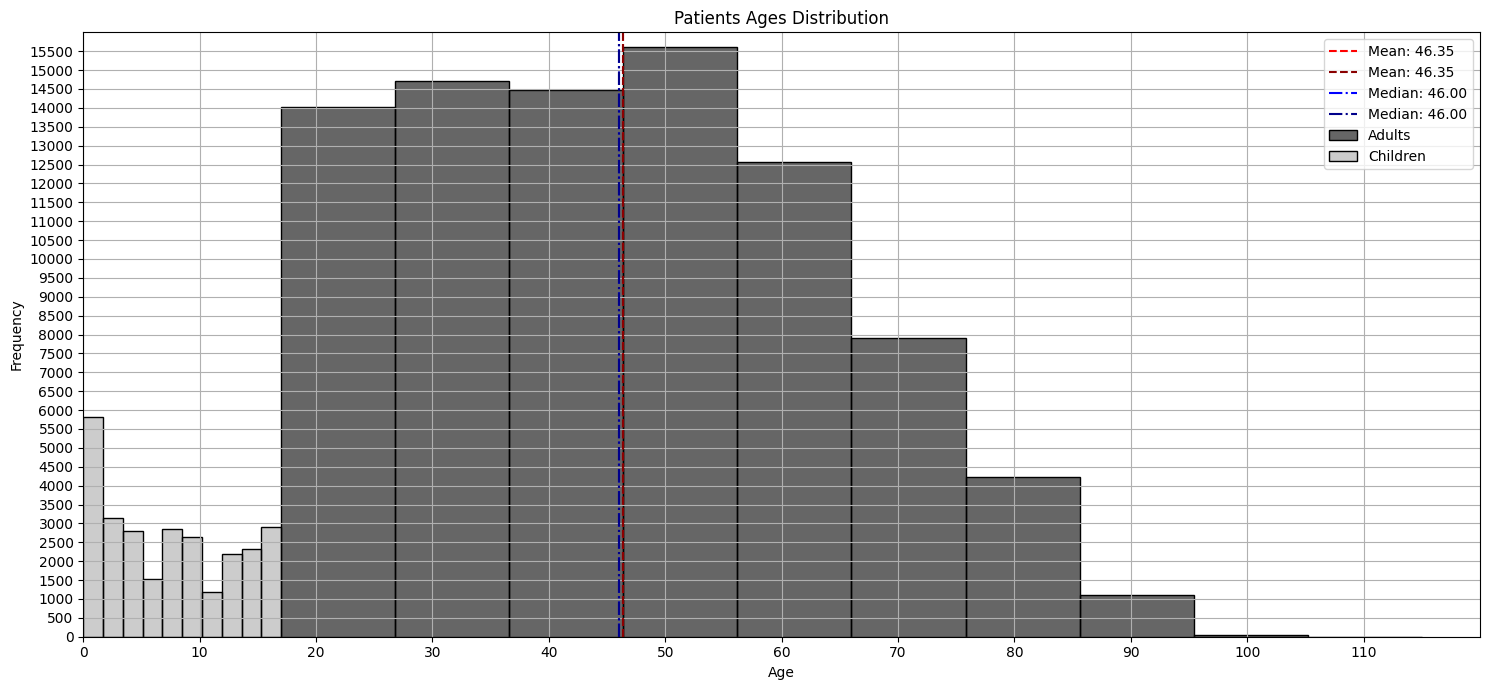

In [7]:
plot_dual_histogram(df_patients_adult['age'], df_patients_pediatric['age'], bins=10, color1='black',color2='grey', title='Patients Ages Distribution', xlabel='Age',
                    ylabel='Frequency', label1='Adults', label2='Children', xticks_range=(0, 120, 10), yticks_range=(0, 16000, 500))

___

### EDA for Patients full data set clean

In [8]:
df_patients_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110527 non-null  int64              
 1   appointment_id   110527 non-null  int64              
 2   gender           110527 non-null  object             
 3   scheduled_day    110527 non-null  datetime64[ns, UTC]
 4   appointment_day  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int64              
 6   neighbourhood    110527 non-null  object             
 7   scholarship      110527 non-null  bool               
 8   hipertension     110527 non-null  bool               
 9   diabetes         110527 non-null  bool               
 10  alcoholism       110527 non-null  bool               
 11  handcap          110527 non-null  bool               
 12  sms_received     110527 non-null  bool               
 13 

In [9]:
print(df_patients_clean.sample(25, random_state=333))

             patient_id  appointment_id  gender             scheduled_day           appointment_day  age      neighbourhood  scholarship  \
46995    62566927247961         5607061  female 2016-04-20 11:02:15+00:00 2016-05-18 00:00:00+00:00    1             jabour        False   
82570     3996739777887         5645533    male 2016-05-02 10:03:24+00:00 2016-05-02 00:00:00+00:00   11          conquista        False   
71800    74981215322154         5664902  female 2016-05-05 13:39:17+00:00 2016-05-05 00:00:00+00:00   66        santa_lúcia        False   
78525   746757565862383         5700616  female 2016-05-16 09:37:32+00:00 2016-05-17 00:00:00+00:00   78        santo_andre        False   
63501    49375648372849         5704393  female 2016-05-16 15:37:53+00:00 2016-05-19 00:00:00+00:00   46           da_penha        False   
38007    85922122763292         5634129    male 2016-04-28 10:25:11+00:00 2016-05-25 00:00:00+00:00   39     forte_são_joão         True   
104172   58171584692

## Visualizing missing values

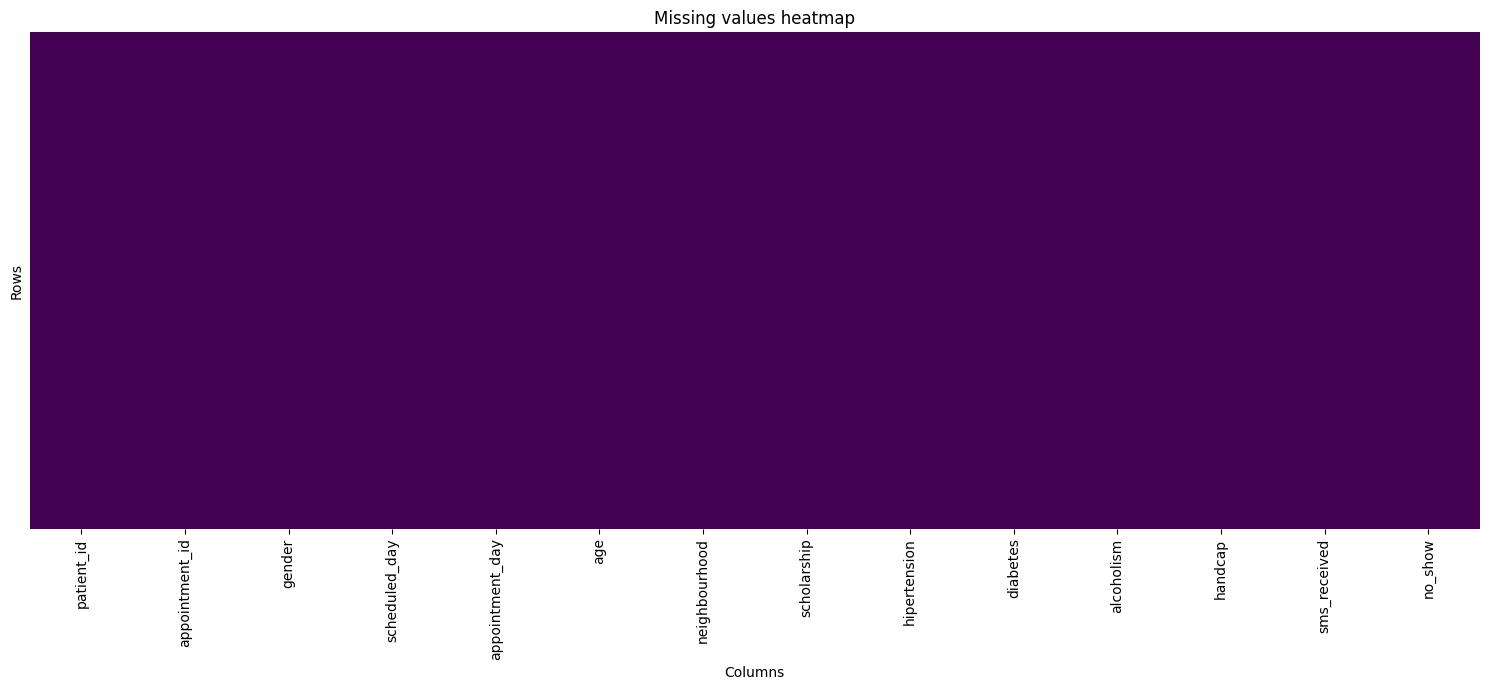

In [10]:
missing_values_heatmap(df_patients_clean)

## Statistical information on quantitative and categorical values

In [11]:
print(df_patients_clean['age'].describe())

count    110527.000000
mean         37.089218
std          23.109921
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64


In [12]:
print(df_patients_clean.describe(include='object'))

        gender   neighbourhood no_show
count   110527          110527  110527
unique       2              81       2
top     female  jardim_camburi      no
freq     71840            7717   88208


## Data dispersion statistics for age with boxplot graph

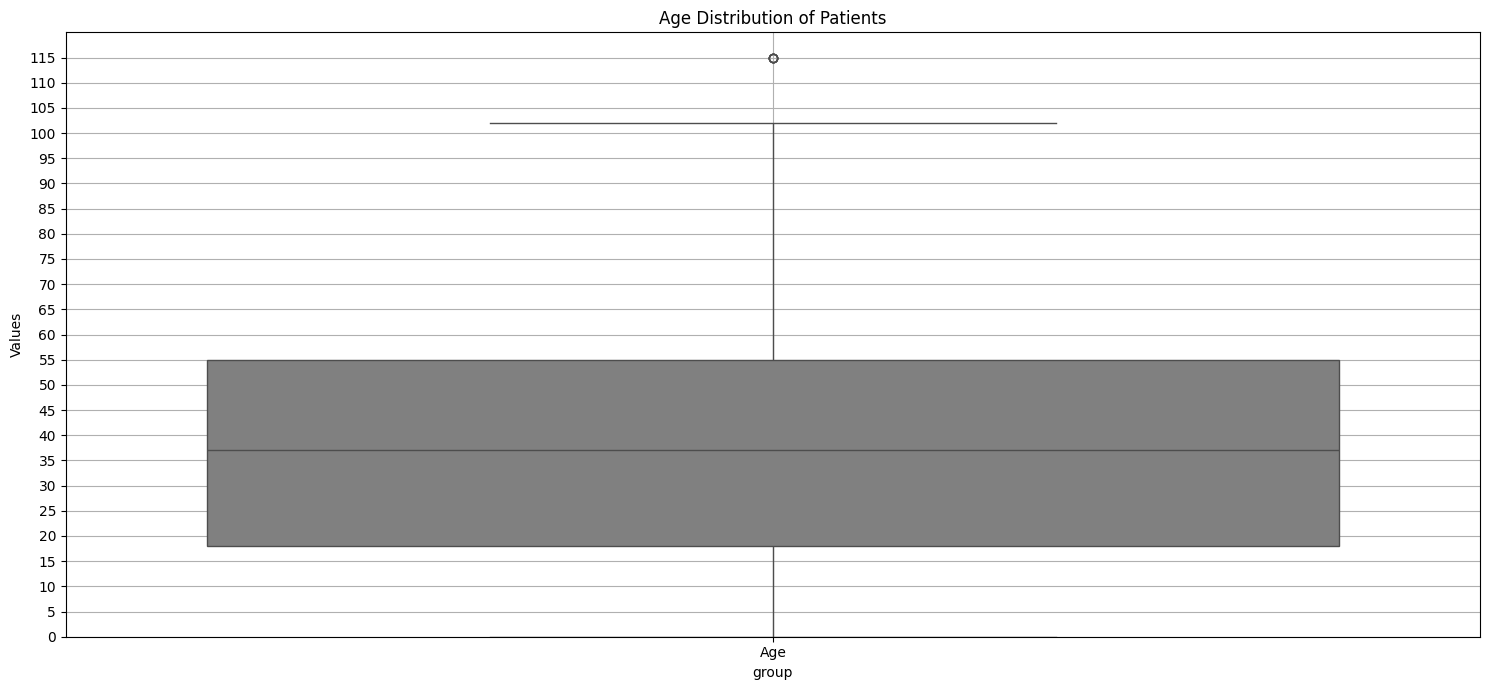

In [13]:
plot_boxplots([df_patients_clean['age']], ['Age'], 'Values', 'Age Distribution of Patients', yticks_range=(0, 120, 5), rotation=0, color='grey')

In [14]:
Q1 = df_patients_clean['age'].quantile(0.25)
Q3 = df_patients_clean['age'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_patients_clean[(df_patients_clean['age'] < Q1 - 1.5 * IQR) | (df_patients_clean['age'] > Q3 + 1.5 * IQR)]

lower_bound_ol_age = Q1 - 1.5 * IQR
upper_bound_ol_age = Q3 + 1.5 * IQR

print(f"> Upper outlier bound for patients' age: {upper_bound_ol_age}\n")
print(f"> Age outliers: \n")
print(outliers)

> Upper outlier bound for patients' age: 110.5

> Age outliers: 

            patient_id  appointment_id  gender             scheduled_day           appointment_day  age neighbourhood  scholarship  hipertension  \
63912   31963211613981         5700278  female 2016-05-16 09:17:44+00:00 2016-05-19 00:00:00+00:00  115    andorinhas        False         False   
63915   31963211613981         5700279  female 2016-05-16 09:17:44+00:00 2016-05-19 00:00:00+00:00  115    andorinhas        False         False   
68127   31963211613981         5562812  female 2016-04-08 14:29:17+00:00 2016-05-16 00:00:00+00:00  115    andorinhas        False         False   
76284   31963211613981         5744037  female 2016-05-30 09:44:51+00:00 2016-05-30 00:00:00+00:00  115    andorinhas        False         False   
97666  748234579244724         5717451  female 2016-05-19 07:57:56+00:00 2016-06-03 00:00:00+00:00  115      são_jose        False          True   

       diabetes  alcoholism  handcap  sms_rec

##### Patients Age Distribution

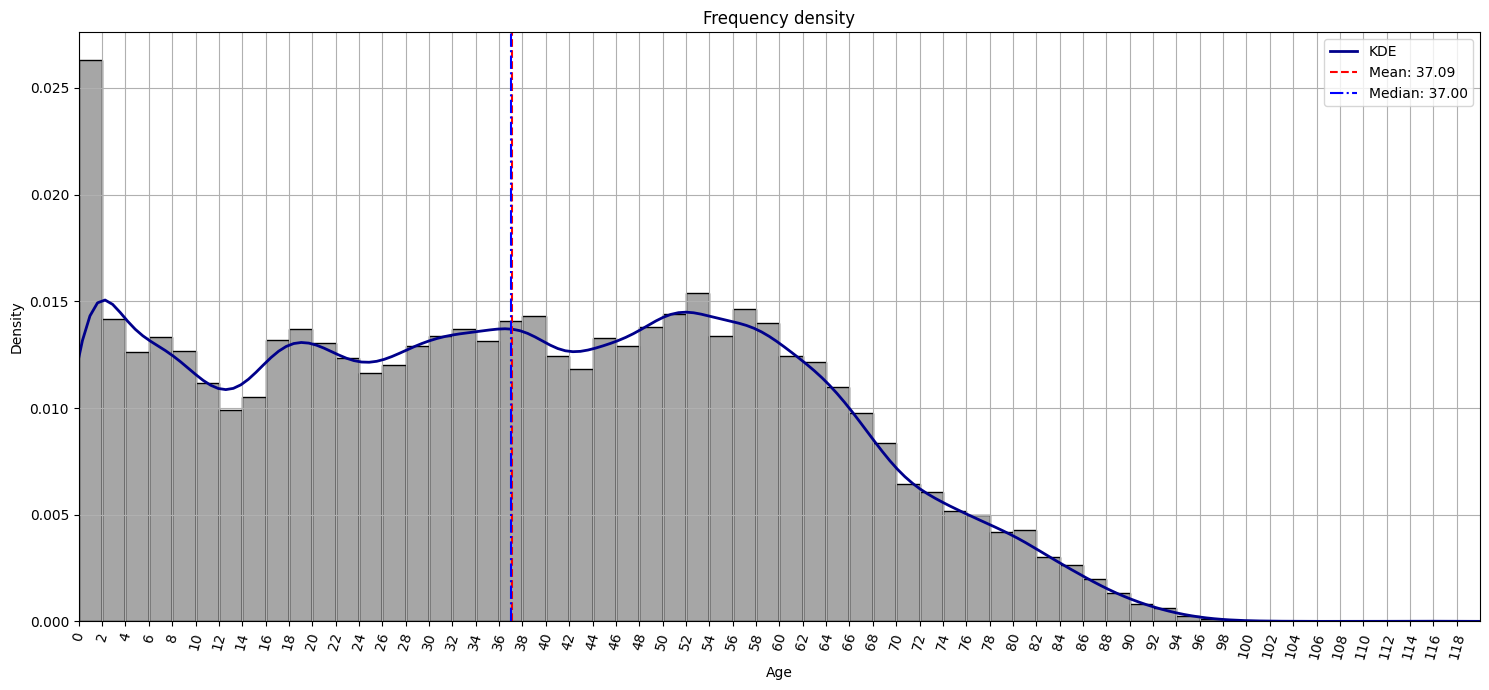

In [15]:
plot_frequency_density(df_patients_clean['age'], bins=np.arange(0, 120, 2), color='grey', title='Frequency density', xlabel='Age',
                       ylabel='Density', xticks_range=(0, 120, 2), rotation=75, show_kde=True)

In [16]:
print(f"> Gender patients amount: \n\n{df_patients_clean['gender'].value_counts()}")
print()
print(f"> Female patients: {(df_patients_clean['gender'].value_counts().iloc[0]*100)/110527:.2f} %")
print(f"> Male patients: {(df_patients_clean['gender'].value_counts().iloc[1]*100)/110527:.2f} %")

> Gender patients amount: 

gender
female    71840
male      38687
Name: count, dtype: int64

> Female patients: 65.00 %
> Male patients: 35.00 %


##### Female Patients Age Distribution

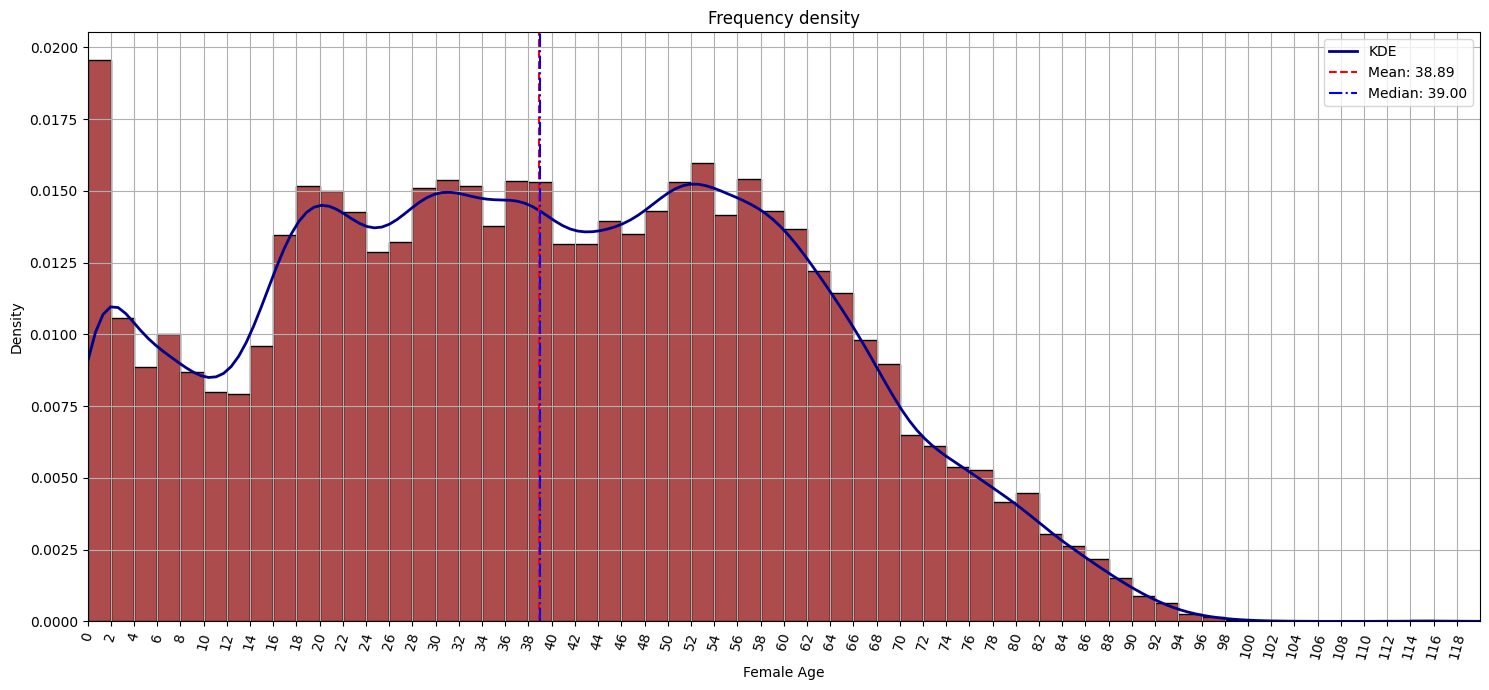

In [17]:
df_female_age = df_patients_clean.loc[(df_patients_clean['gender'] == 'female'), :]

plot_frequency_density(df_female_age['age'], bins=np.arange(0, 120, 2), color='darkred', title='Frequency density', xlabel='Female Age',
                       ylabel='Density', xticks_range=(0, 120, 2), rotation=75, show_kde=True)

In [18]:
print(df_female_age.describe())

         patient_id  appointment_id           age
count  7.184000e+04    7.184000e+04  71840.000000
mean   1.460136e+14    5.674337e+06     38.894516
std    2.549561e+14    7.201597e+04     22.154736
min    3.921700e+04    5.030230e+06      0.000000
25%    3.974486e+12    5.639222e+06     21.000000
50%    2.987250e+13    5.679852e+06     39.000000
75%    9.395978e+13    5.724905e+06     56.000000
max    9.999816e+14    5.790484e+06    115.000000


In [19]:
print(df_female_age.describe(include='object'))

        gender   neighbourhood no_show
count    71840           71840   71840
unique       1              80       2
top     female  jardim_camburi      no
freq     71840            5144   57246


##### Male Patients Age Distribution

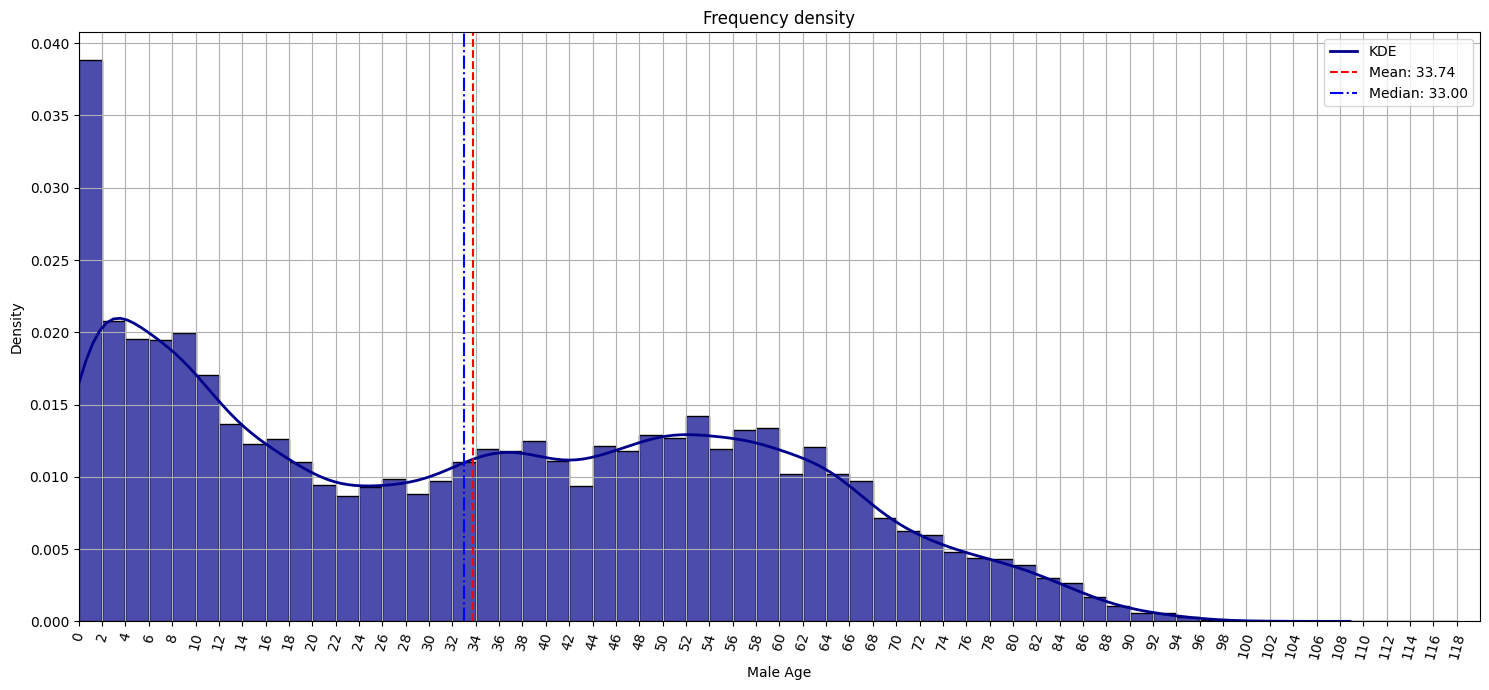

In [20]:
df_male_age = df_patients_clean.loc[(df_patients_clean['gender'] == 'male'), :]

plot_frequency_density(df_male_age['age'], bins=np.arange(0, 120, 2), color='darkblue', title='Frequency density', xlabel='Male Age',
                       ylabel='Density', xticks_range=(0, 120, 2), rotation=75, show_kde=True)

In [21]:
print(df_male_age.describe())

         patient_id  appointment_id           age
count  3.868700e+04    3.868700e+04  38687.000000
mean   1.502496e+14    5.677102e+06     33.736863
std    2.581770e+14    6.990406e+04     24.435221
min    4.374100e+04    5.122866e+06      0.000000
25%    4.346759e+12    5.642308e+06     10.000000
50%    3.336718e+13    5.681916e+06     33.000000
75%    9.488922e+13    5.726456e+06     54.000000
max    9.999465e+14    5.790466e+06    100.000000


In [22]:
print(df_male_age.describe(include='object'))

       gender   neighbourhood no_show
count   38687           38687   38687
unique      1              79       2
top      male  jardim_camburi      no
freq    38687            2573   30962


##### Patients No-Show

In [23]:
print(f"> No show patients amount: \n\n{df_patients_clean['no_show'].value_counts()}")
print()
print(f"> Show patients: {(df_patients_clean['no_show'].value_counts().iloc[0]*100)/110527:.2f} %")
print(f"> No Show patients: {(df_patients_clean['no_show'].value_counts().iloc[1]*100)/110527:.2f} %")

> No show patients amount: 

no_show
no     88208
yes    22319
Name: count, dtype: int64

> Show patients: 79.81 %
> No Show patients: 20.19 %


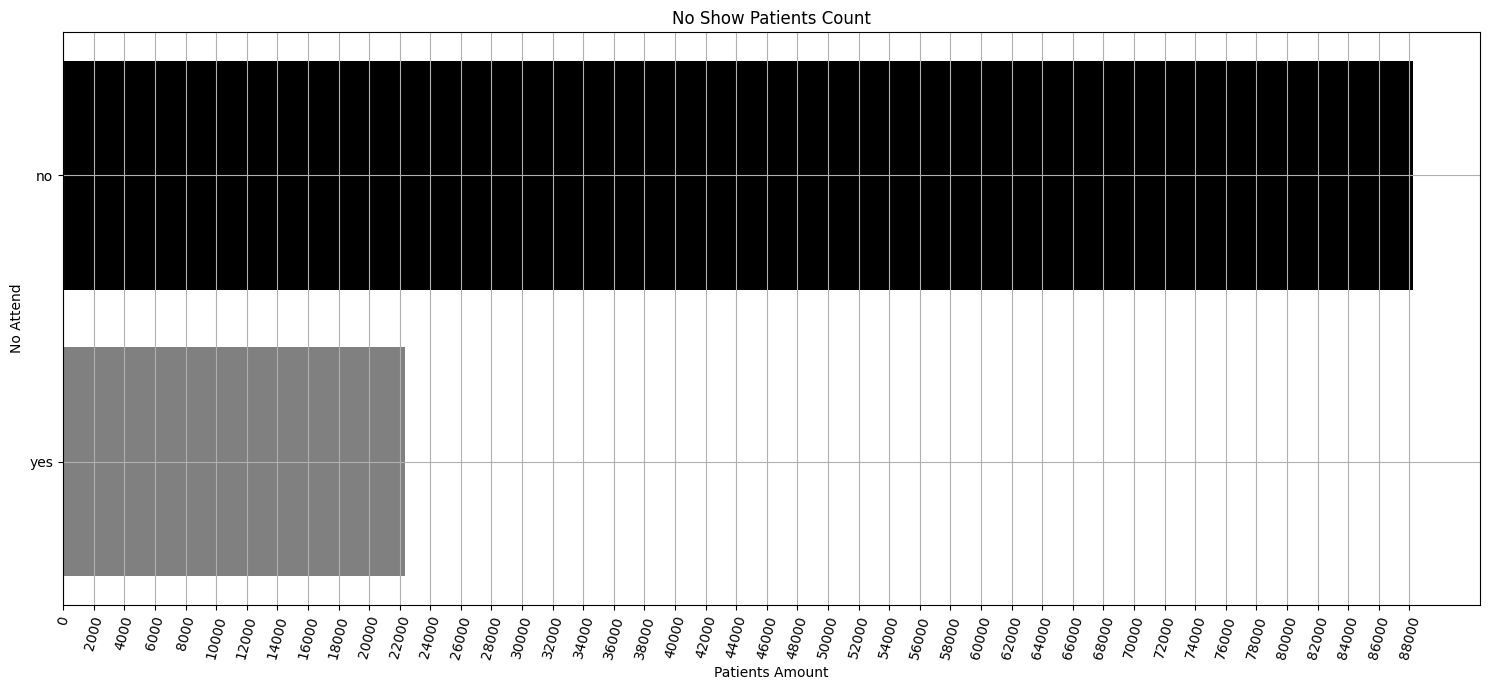

In [24]:
plot_horizontal_bar(df_patients_clean['no_show'], colors=['black', 'grey'], xlabel='Patients Amount', ylabel='No Attend', 
                    title='No Show Patients Count', xticks_range=(0, 88210, 2000), rotation=75)

##### Female Patients no Show


In [25]:
print(f"> No show female patients amount: \n\n{df_patients_clean.loc[(df_patients_clean['gender'] == 'female'), 'no_show'].value_counts()}")
print()
print(f"> Show female patients: {(df_patients_clean.loc[(df_patients_clean['gender'] == 'female'), 'no_show'].value_counts().iloc[0]*100)/110527:.2f} %")
print(f"> No Show female patients: {(df_patients_clean.loc[(df_patients_clean['gender'] == 'female'), 'no_show'].value_counts().iloc[1]*100)/110527:.2f} %")

> No show female patients amount: 

no_show
no     57246
yes    14594
Name: count, dtype: int64

> Show female patients: 51.79 %
> No Show female patients: 13.20 %


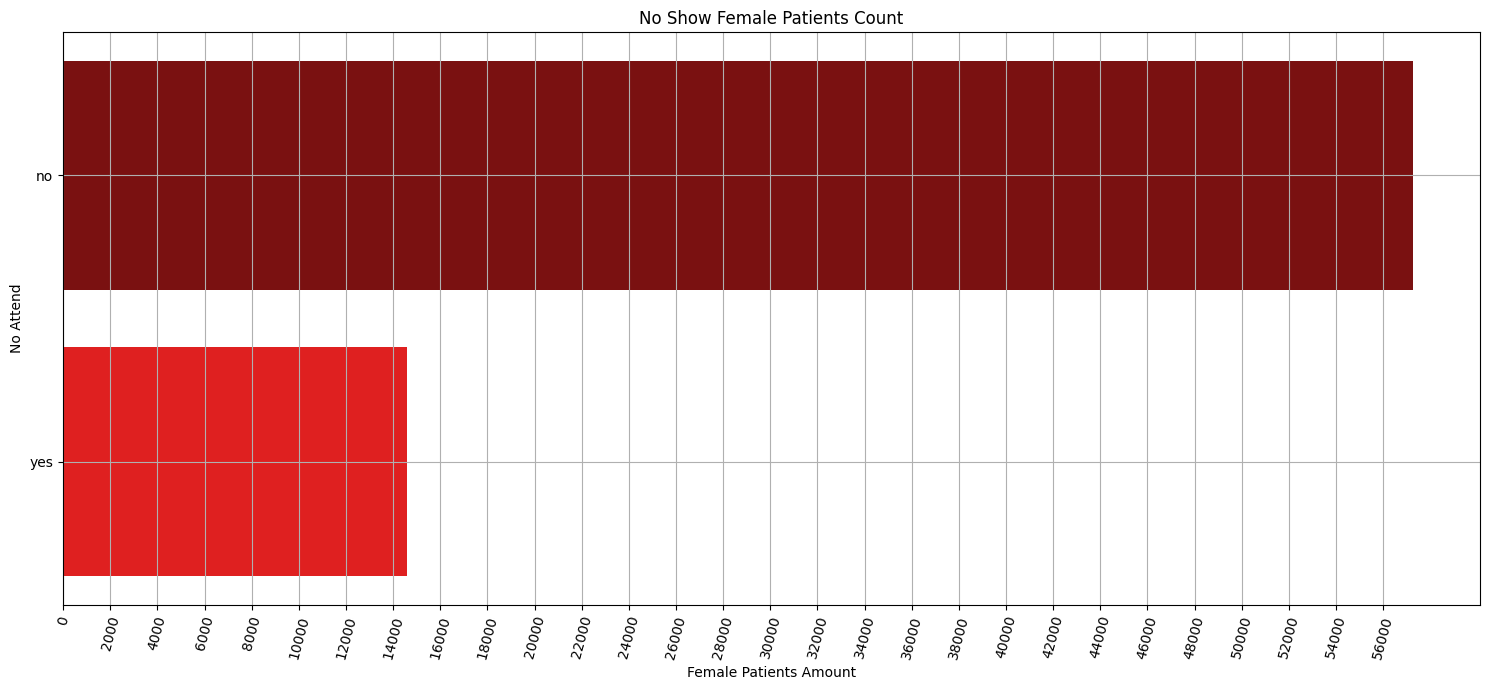

In [26]:
plot_horizontal_bar(df_patients_clean.loc[(df_patients_clean['gender'] == 'female'), 'no_show'], colors=['darkred', 'red'], xlabel='Female Patients Amount', 
                    ylabel='No Attend', title='No Show Female Patients Count', xticks_range=(0, 57250, 2000), rotation=75)

##### Male Patients no Show

In [27]:
print(f"> No show male patients amount: \n\n{df_patients_clean.loc[(df_patients_clean['gender'] == 'male'), 'no_show'].value_counts()}")
print()
print(f"> Show male patients: {(df_patients_clean.loc[(df_patients_clean['gender'] == 'male'), 'no_show'].value_counts().iloc[0]*100)/110527:.2f} %")
print(f"> No Show male patients: {(df_patients_clean.loc[(df_patients_clean['gender'] == 'male'), 'no_show'].value_counts().iloc[1]*100)/110527:.2f} %")

> No show male patients amount: 

no_show
no     30962
yes     7725
Name: count, dtype: int64

> Show male patients: 28.01 %
> No Show male patients: 6.99 %


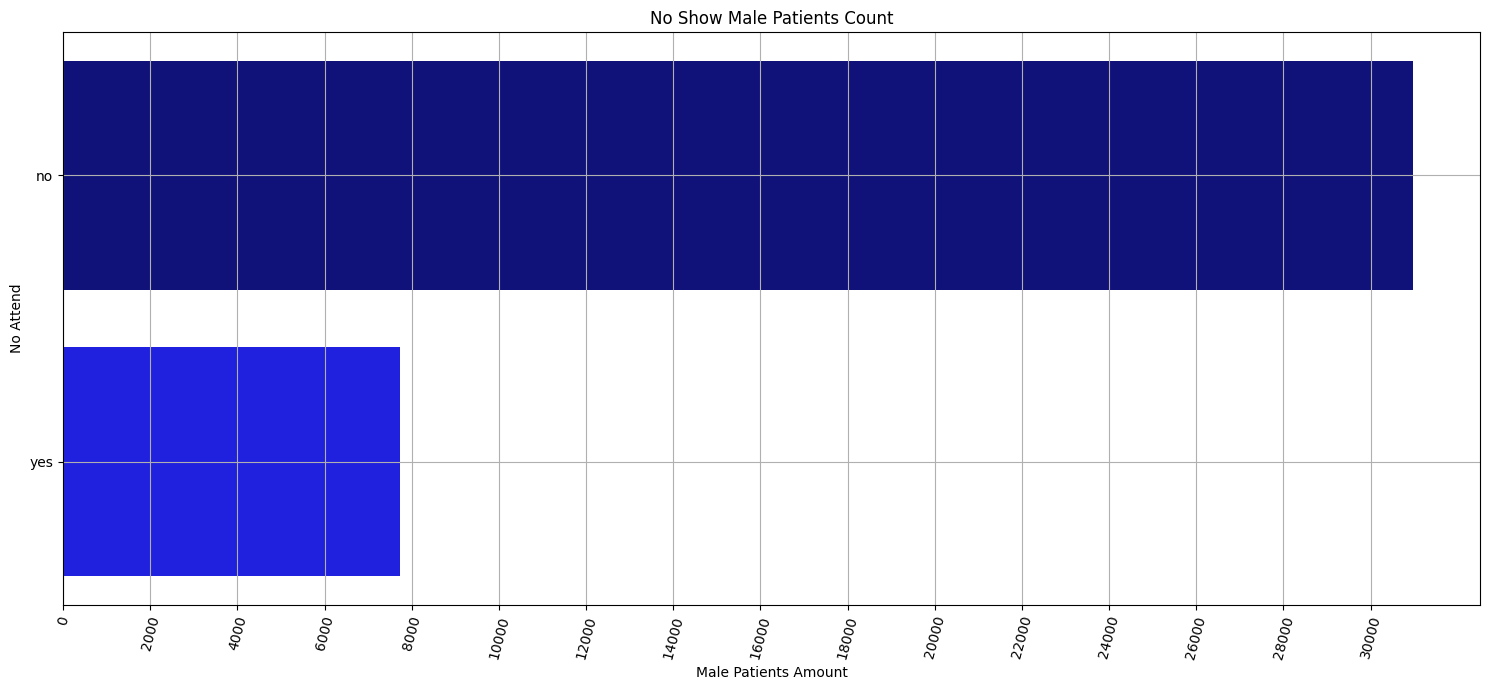

In [28]:
plot_horizontal_bar(df_patients_clean.loc[(df_patients_clean['gender'] == 'male'), 'no_show'], colors=['darkblue', 'blue'], xlabel='Male Patients Amount', 
                    ylabel='No Attend', title='No Show Male Patients Count', xticks_range=(0, 30970, 2000), rotation=75)

---

### 🔍 Waiting time between scheduling and appointment

In [29]:
patients_dayswaiting_noshow_correlation = df_patients_dayswaiting_noshow[['no_show_bin', 'days_waiting']].corr()
print(patients_dayswaiting_noshow_correlation)

              no_show_bin  days_waiting
no_show_bin      1.000000      0.186231
days_waiting     0.186231      1.000000


c:\Users\luisp\OneDrive\Documentos\GitHub\Data-Driven-Insights-on-Patient-No-Shows\src\eda.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y='value', data=df, palette=palette)


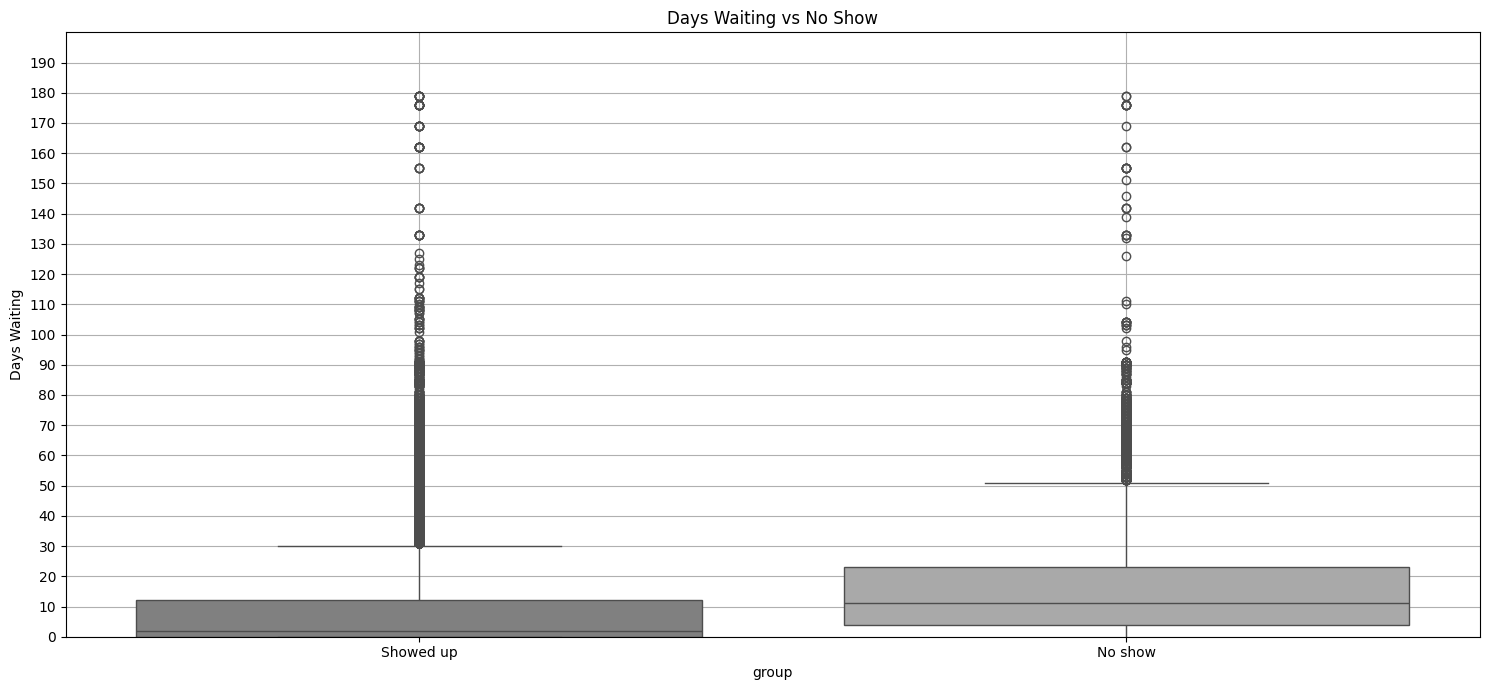

In [30]:
plot_boxplots(ds_list=[df_patients_dayswaiting_noshow.loc[(df_patients_dayswaiting_noshow['no_show_bin'] == 0), 'days_waiting'], 
                       df_patients_dayswaiting_noshow.loc[(df_patients_dayswaiting_noshow['no_show_bin'] == 1), 'days_waiting']], 
              xlabels=['Showed up', 'No show'], ylabel='Days Waiting', title='Days Waiting vs No Show', color=['Grey', 'Darkgrey'],  yticks_range=(0, 200, 10))


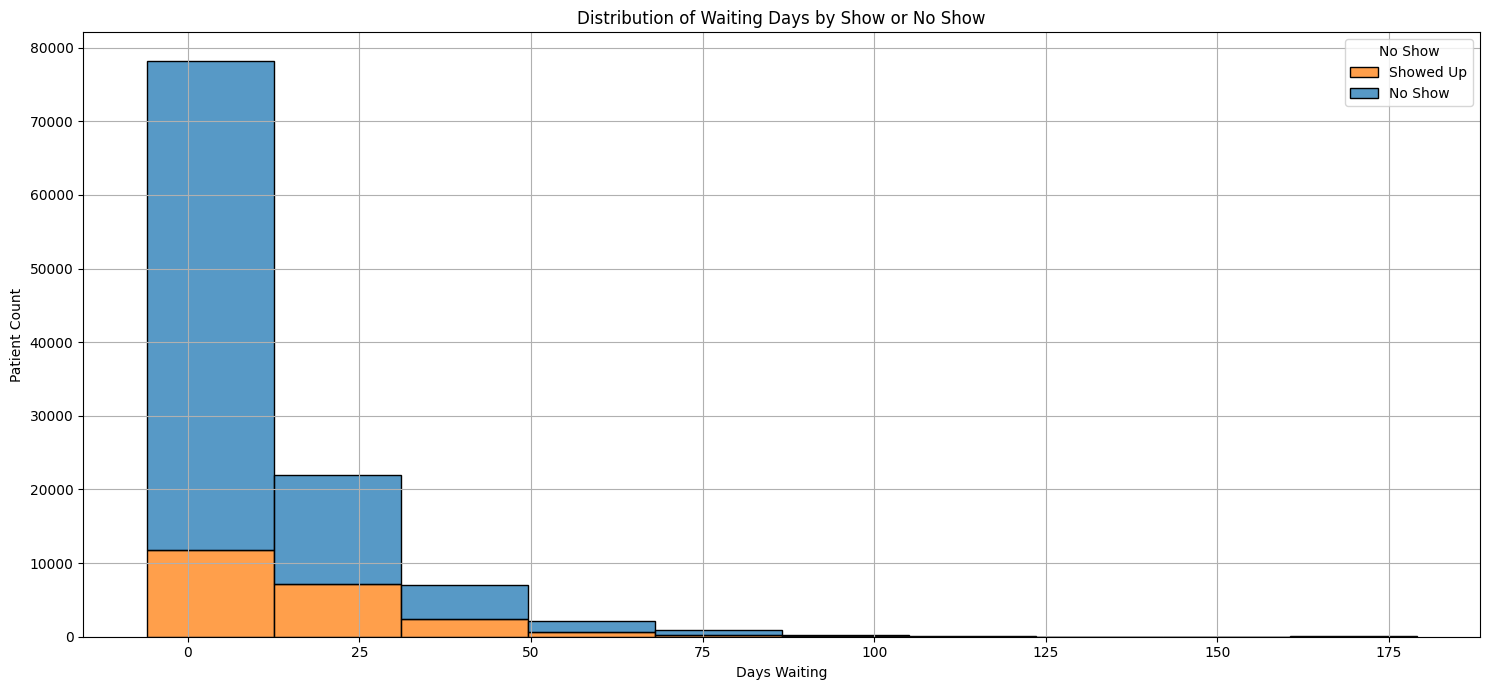

In [31]:
plot_hue_histogram(df_patients_dayswaiting_noshow, x_col='days_waiting', hue_col='no_show_bin', bins=10, title='Distribution of Waiting Days by Show or No Show', 
                   xlabel='Days Waiting', ylabel='Patient Count', legend_title ='No Show', legend_labels=['Showed Up', 'No Show'])